## Airline Passenger Satisfaction Data Analysis and Visualisation Project
**Team #27:** [Maryna Kostiuk](https://github.com/samamaryna), [Ying Li](https://github.com/yingliamanda), [Yinglin Zhang](https://github.com/Jolin0101), [Tetiana Nurkanova](https://github.com/nurkanovat)

Welcome to our second team project within Data Science Certificate. For this project we used the dataset [Airline Passenger Satisfaction](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction). Within this project we will analyse data and answer four questions: 
- What percentage of airline passengers are satisfied?
- question 2
- Does flight distance affect customer preferences or flight patterns?
- question 4


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# import dataset into df and take a look at the first 5 rows of the data:

df = pd.read_csv('./data/raw/airline_passenger_satisfaction.csv')
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


### Data exploration and cleaning

In [18]:
#to check how many rows and columns our dataframe has:
df.shape

(129880, 24)

In [19]:
# to see what columns look like
df.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [20]:
# to explore how many null values we have: 
df.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [21]:
#to remove null values from dataset

df.dropna(subset=['Arrival Delay'], inplace=True)

In [22]:
#to check for null values

df.isnull().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

In [23]:
#to check for duplicates

df.duplicated().sum()

0

### What percentage of airline passengers are satisfied?

In [24]:
#to calculate the percentage of satisfied customers: 

satisf = df['Satisfaction'].value_counts()
satisf_percentages = round(satisf / satisf.sum() * 100, 2)

print(satisf_percentages)



Satisfaction
Neutral or Dissatisfied    56.55
Satisfied                  43.45
Name: count, dtype: float64


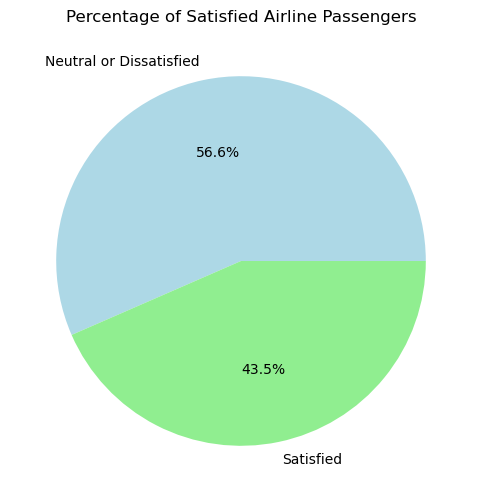

In [25]:
plt.figure(figsize=(8, 6))
satisf_percentages.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Percentage of Satisfied Airline Passengers')
plt.ylabel('')
plt.show()

The analysis shows that 43.5% of customers are satisfied with services that this airline company provides. 

Q3 

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# ensure the Flight Distance to numeric and remove all the blanks.
df['Flight Distance'] = pd.to_numeric(df['Flight Distance'], errors='coerce')
df = df.dropna(subset=['Flight Distance','Class'])

In [28]:
# Define the order from the 'Class' column
class_order = ['Economy', 'Economy Plus', 'Business']

# Reorder the 'Class' column
df['Class'] = pd.Categorical(df['Class'],categories=class_order, ordered=True)

Text(0, 0.5, 'Class')

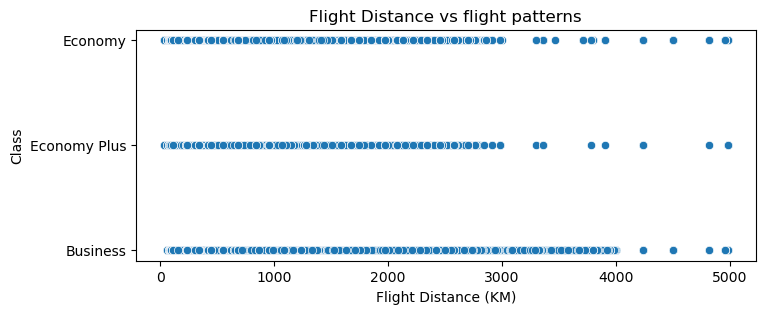

In [29]:
plt.figure(figsize=(8,3))
sns.scatterplot(x ='Flight Distance', y = 'Class',data = df)

# Add title and label
plt.title('Flight Distance vs flight patterns')
plt.xlabel('Flight Distance (KM)')
plt.ylabel('Class')

If the flight distance is less than 3000 km, the flight patterns are similar. However, for distances greater than 3000 km, a higher proportion of passengers choose business class.